In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [46]:
start="2013-01-01"
end="2022-12-31"

df = pdr.DataReader("TSLA", start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2013-01-02  2.333333  2.363333  2.314000  2.357333   2.357333  17922000
2013-01-03  2.345333  2.363333  2.316667  2.318000   2.318000  11130000
2013-01-04  2.320000  2.320000  2.261333  2.293333   2.293333  10110000
2013-01-07  2.320000  2.320000  2.260000  2.289333   2.289333   6630000
2013-01-08  2.300000  2.300000  2.207333  2.245333   2.245333  19260000

In [47]:
df=df.reset_index()
df.head()

Date      Open      High       Low     Close  Adj Close    Volume
0 2013-01-02  2.333333  2.363333  2.314000  2.357333   2.357333  17922000
1 2013-01-03  2.345333  2.363333  2.316667  2.318000   2.318000  11130000
2 2013-01-04  2.320000  2.320000  2.261333  2.293333   2.293333  10110000
3 2013-01-07  2.320000  2.320000  2.260000  2.289333   2.289333   6630000
4 2013-01-08  2.300000  2.300000  2.207333  2.245333   2.245333  19260000

In [48]:
df= df.drop(['Date','Adj Close'], axis=1)
df

Open        High         Low       Close     Volume
0       2.333333    2.363333    2.314000    2.357333   17922000
1       2.345333    2.363333    2.316667    2.318000   11130000
2       2.320000    2.320000    2.261333    2.293333   10110000
3       2.320000    2.320000    2.260000    2.289333    6630000
4       2.300000    2.300000    2.207333    2.245333   19260000
...          ...         ...         ...         ...        ...
2513  126.370003  128.619995  121.019997  123.150002  166989700
2514  117.500000  119.669998  108.760002  109.099998  208643400
2515  110.349998  116.269997  108.239998  112.709999  221070500
2516  120.389999  123.570000  117.500000  121.820000  221923300
2517  119.949997  124.480003  119.750000  123.180000  157304500

[2518 rows x 5 columns]

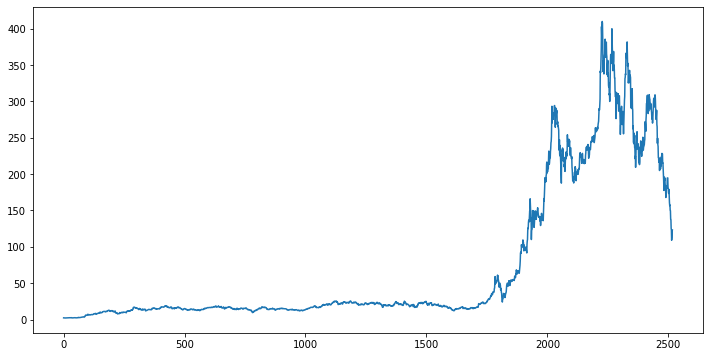

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [50]:
#moving average of 100 days 
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    234.019467
2514    232.024134
2515    230.269534
2516    228.583501
2517    226.981967
Name: Close, Length: 2518, dtype: float64

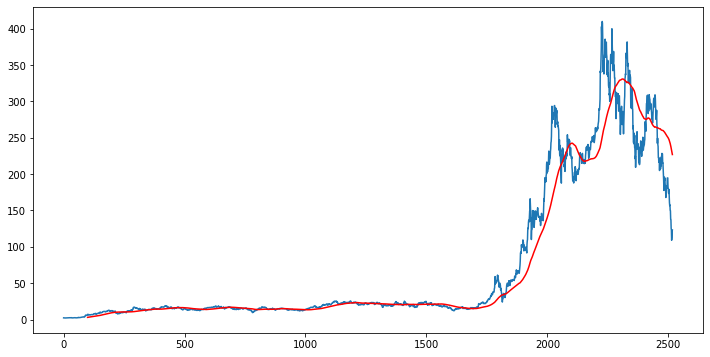

In [51]:
#plot moving avg  of 100
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [52]:
#moving average of 200 days 
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    255.097317
2514    254.317234
2515    253.603501
2516    252.876117
2517    252.091634
Name: Close, Length: 2518, dtype: float64

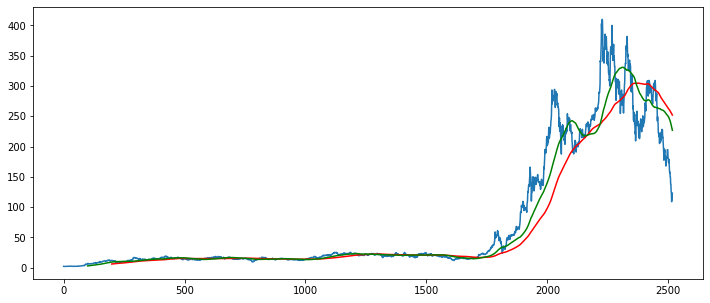

In [53]:
#plot moving avg  of 200
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [54]:
df.shape

(2518, 5)

In [55]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [56]:
'''#splitting data into training and testing
from sklearn.model_selection import train_test_split'''

'#splitting data into training and testing\nfrom sklearn.model_selection import train_test_split'

In [57]:
'''#splitting data into training and testing'''
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int((len(df)*0.70)):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [58]:
data_training

Close
0      2.357333
1      2.318000
2      2.293333
3      2.289333
4      2.245333
...         ...
1757  28.350000
1758  28.729334
1759  28.691999
1760  27.646667
1761  27.888666

[1762 rows x 1 columns]

In [59]:
data_testing

Close
1762   28.684000
1763   29.534000
1764   30.102667
1765   31.270666
1766   32.809334
...          ...
2513  123.150002
2514  109.099998
2515  112.709999
2516  121.820000
2517  123.180000

[756 rows x 1 columns]

In [60]:
#scaling b/w 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0061553 ],
       [0.00467302],
       [0.00374343],
       ...,
       [0.99859303],
       [0.95919907],
       [0.96831893]])

In [62]:
data_training_array.shape

(1762, 1)

In [63]:
#here our features are 100 days i.e first 100 days are x_train and 101th day will be ours y_train
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0]) ## 0 here bcoz of 1 columns in df

In [64]:
x_train

[array([[0.0061553 ],
        [0.00467302],
        [0.00374343],
        [0.00359269],
        [0.00193451],
        [0.00183404],
        [0.00155766],
        [0.        ],
        [0.00087932],
        [0.00248725],
        [0.00298971],
        [0.00369319],
        [0.00404491],
        [0.00572821],
        [0.00776324],
        [0.01025049],
        [0.01022535],
        [0.01286334],
        [0.01266236],
        [0.01158203],
        [0.01155693],
        [0.01354168],
        [0.01213476],
        [0.01311459],
        [0.01572744],
        [0.01650629],
        [0.01590332],
        [0.01384316],
        [0.01251162],
        [0.01391854],
        [0.01346631],
        [0.01037609],
        [0.01600383],
        [0.01414465],
        [0.00565284],
        [0.00803958],
        [0.00369319],
        [0.00381879],
        [0.00550209],
        [0.00482376],
        [0.00437153],
        [0.00670804],
        [0.00939626],
        [0.01200915],
        [0.01336584],
        [0

In [65]:
y_train

[0.19450792933737798,
 0.18018741468174726,
 0.1809913877751722,
 0.16292740260436067,
 0.14993845715353074,
 0.15559130087096396,
 0.15692283413597513,
 0.16189733229454162,
 0.17368038998481333,
 0.16868075194341942,
 0.15466170024298082,
 0.16285203686556263,
 0.1639825948271124,
 0.1693088536764208,
 0.17408234059173622,
 0.17707208183935746,
 0.18031304221630545,
 0.17018817453874896,
 0.16742456644731146,
 0.1722985589842524,
 0.1745848327600742,
 0.18292590086025207,
 0.19179456507180587,
 0.18704618209952828,
 0.21171769758889925,
 0.21332564377574909,
 0.20684370505195826,
 0.21902869537925806,
 0.2228475136633421,
 0.2274702691010615,
 0.22450566773626773,
 0.23289699763220578,
 0.24367508895569634,
 0.23704243672420422,
 0.19129210884325748,
 0.21943071786576013,
 0.21636557493955128,
 0.2179986430393338,
 0.2249076542829802,
 0.22568650546347246,
 0.2230736108797362,
 0.22902793552225637,
 0.2423937995165505,
 0.25553349441487133,
 0.24829788033320532,
 0.254679277495581,
 

In [66]:
x_train, y_train = np.array(x_train), np.array(y_train)
print('X_train:',x_train,y_train)

X_train: [[[0.0061553 ]
  [0.00467302]
  [0.00374343]
  ...
  [0.13649725]
  [0.15029018]
  [0.161219  ]]

 [[0.00467302]
  [0.00374343]
  [0.00359269]
  ...
  [0.15029018]
  [0.161219  ]
  [0.19450793]]

 [[0.00374343]
  [0.00359269]
  [0.00193451]
  ...
  [0.161219  ]
  [0.19450793]
  [0.18018741]]

 ...

 [[0.49704795]
  [0.50375596]
  [0.51601639]
  ...
  [0.97055496]
  [0.98570459]
  [1.        ]]

 [[0.50375596]
  [0.51601639]
  [0.50775064]
  ...
  [0.98570459]
  [1.        ]
  [0.99859303]]

 [[0.51601639]
  [0.50775064]
  [0.49267641]
  ...
  [1.        ]
  [0.99859303]
  [0.95919907]]] [0.19450793 0.18018741 0.18099139 ... 0.99859303 0.95919907 0.96831893]


In [67]:
x_train.shape

(1662, 100, 1)

In [68]:
#ml model
import tensorflow as tf

In [69]:
tf.__version__

'2.9.2'

In [70]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=90, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

In [71]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 30s 537ms/step - loss: 0.0201
Epoch 2/10
52/52 [==============================] - 17s 326ms/step - loss: 0.0095
Epoch 3/10
52/52 [==============================] - 16s 310ms/step - loss: 0.0043
Epoch 4/10
52/52 [==============================] - 16s 306ms/step - loss: 0.0035
Epoch 5/10
52/52 [==============================] - 18s 339ms/step - loss: 0.0031
Epoch 6/10
52/52 [==============================] - 16s 310ms/step - loss: 0.0030
Epoch 7/10
52/52 [==============================] - 16s 312ms/step - loss: 0.0028
Epoch 8/10
52/52 [==============================] - 16s 304ms/step - loss: 0.0026
Epoch 9/10
52/52 [==============================] - 17s 333ms/step - loss: 0.0027
Epoch 10/10
52/52 [==============================] - 16s 308ms/step - loss: 0.0024


In [72]:
model.save('tensor_model.h5')

In [73]:
data_testing.head()

Close
1762  28.684000
1763  29.534000
1764  30.102667
1765  31.270666
1766  32.809334

In [74]:
data_training.tail(10)

Close
1752  25.266001
1753  26.209999
1754  26.936001
1755  27.039333
1756  27.948000
1757  28.350000
1758  28.729334
1759  28.691999
1760  27.646667
1761  27.888666

In [75]:
past_100_days= data_training.tail(100)

In [76]:
final_testing = past_100_days.append(data_testing, ignore_index=True)

In [77]:
final_testing.head()

Close
0  15.667333
1  15.267333
2  15.666667
3  14.641333
4  14.376000

In [78]:
input_data = scaler.fit_transform(final_testing)
input_data

array([[3.97598427e-03],
       [2.96556954e-03],
       [3.97430278e-03],
       [1.38426795e-03],
       [7.14028340e-04],
       [1.43816010e-03],
       [2.59845194e-03],
       [2.43510120e-03],
       [1.58803721e-03],
       [1.81032941e-03],
       [0.00000000e+00],
       [6.06248841e-04],
       [4.51320027e-04],
       [7.05608819e-04],
       [1.73623281e-03],
       [2.39300119e-03],
       [2.29195971e-03],
       [1.56277624e-03],
       [3.06155930e-03],
       [2.70286122e-03],
       [3.43373101e-03],
       [4.06524082e-03],
       [6.01197370e-03],
       [5.80483663e-03],
       [5.69200782e-03],
       [5.28952343e-03],
       [5.62296053e-03],
       [5.40404336e-03],
       [5.92777367e-03],
       [4.92072193e-03],
       [5.02345212e-03],
       [1.98883529e-03],
       [2.91336610e-03],
       [5.24742823e-03],
       [5.17501313e-03],
       [4.96282676e-03],
       [5.60612631e-03],
       [5.34341799e-03],
       [3.64254717e-03],
       [3.37310565e-03],


In [79]:
input_data.shape

(856, 1)

In [80]:
x_test = []
y_test= []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0]) ## 4 here bcoz of 4 columns in df

In [81]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


##Making prediction

In [82]:
y_pred = model.predict(x_test)
y_pred

24/24 [==============================] - 1s 27ms/step


array([[0.15258665],
       [0.15290381],
       [0.15323386],
       [0.15357769],
       [0.15394329],
       [0.15434237],
       [0.15475743],
       [0.15517937],
       [0.15564017],
       [0.15614013],
       [0.15665323],
       [0.15716796],
       [0.15767522],
       [0.15819955],
       [0.15875036],
       [0.15932025],
       [0.15989436],
       [0.16045982],
       [0.16101815],
       [0.16157486],
       [0.16217327],
       [0.16280942],
       [0.16358106],
       [0.1645543 ],
       [0.16556768],
       [0.16661996],
       [0.16769272],
       [0.16878949],
       [0.16989556],
       [0.17098926],
       [0.17208952],
       [0.17317756],
       [0.17429209],
       [0.17547059],
       [0.1766767 ],
       [0.17789432],
       [0.17904225],
       [0.18008369],
       [0.18100382],
       [0.18171613],
       [0.18222734],
       [0.18262234],
       [0.18291177],
       [0.18311068],
       [0.18320812],
       [0.1832    ],
       [0.18301742],
       [0.182

In [83]:
y_test

array([0.0368566 , 0.03900373, 0.04044021, 0.04339062, 0.04727735,
       0.0454586 , 0.0449214 , 0.05278748, 0.05498682, 0.05171644,
       0.05087274, 0.05036922, 0.0565496 , 0.06031509, 0.06075967,
       0.05951685, 0.05837171, 0.05986712, 0.06223992, 0.07231377,
       0.07395738, 0.09575373, 0.11378291, 0.08812509, 0.09052651,
       0.09037663, 0.09428526, 0.0948073 , 0.09361333, 0.09979539,
       0.09912684, 0.10895649, 0.11889561, 0.11586268, 0.11613044,
       0.1048121 , 0.09910662, 0.09555164, 0.07874506, 0.07689095,
       0.08962725, 0.08994553, 0.09061745, 0.08641412, 0.08286756,
       0.06678848, 0.07307495, 0.07120568, 0.05879777, 0.05645193,
       0.03935064, 0.03684649, 0.02523008, 0.03641538, 0.03639686,
       0.03753526, 0.04944301, 0.0552108 , 0.05334321, 0.05101926,
       0.0489597 , 0.05264266, 0.04549565, 0.04093363, 0.04523463,
       0.05133585, 0.0562549 , 0.05682578, 0.06089439, 0.07402137,
       0.08394702, 0.08730497, 0.089895  , 0.09135674, 0.09008

In [84]:
y_pred.shape

(756, 1)

In [85]:
scaler.scale_ #factor by all values are scale down

array([0.00252604])

In [86]:
scle_factr = 1/0.00252604
y_pred= y_pred*scle_factr
y_test = y_test*scle_factr

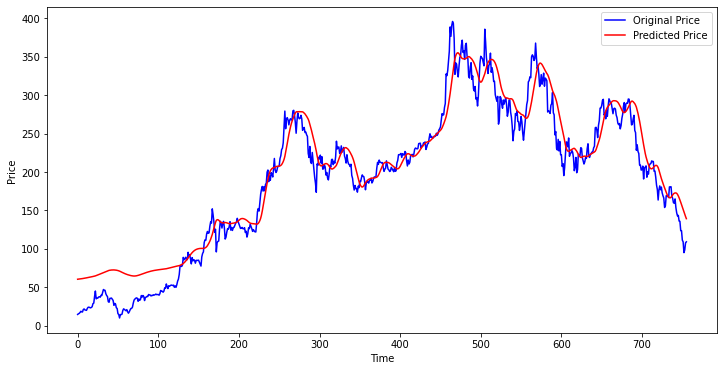

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()